In [1]:
tests_jsonl_path_1 = "/home/dennis/llp/eval/evals/registry/data/testrag/tests_gen.jsonl"
tests_jsonl_path_2 = "/home/dennis/llp/eval/evals/registry/data/testrag/tests_gen_2.jsonl"

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from lib.component.json_handle import load_dicts_from_jsonl, save_dicts_to_jsonl

In [3]:
tests_1 = load_dicts_from_jsonl(tests_jsonl_path_1)

In [4]:
tests_2 = load_dicts_from_jsonl(tests_jsonl_path_2)

In [5]:
tests_1[0]

{'question': 'Чем оснащен Audi A605 в базовой комплектации?',
 'answer': 'Ходовой частью со стальными пружинами'}

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def analyze_and_plot(data):
    question_lengths = [len(obj['question']) for obj in data]
    answer_lengths = [len(obj['answer']) for obj in data]

    # Построение графиков распределения длин вопросов и ответов
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(question_lengths, bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title('Распределение длин вопросов')
    plt.xlabel('Длина вопроса')
    plt.ylabel('Частота')

    plt.subplot(1, 2, 2)
    plt.hist(answer_lengths, bins=20, alpha=0.7, color='green', edgecolor='black')
    plt.title('Распределение длин ответов')
    plt.xlabel('Длина ответа')
    plt.ylabel('Частота')

    plt.tight_layout()
    plt.show()

    # Вычисление статистических метрик
    def calculate_statistics(lengths):
        mean = np.mean(lengths)
        median = np.median(lengths)
        std_dev = np.std(lengths)
        q1 = np.percentile(lengths, 25)
        q3 = np.percentile(lengths, 75)
        iqr = q3 - q1
        return {
            'mean': mean,
            'median': median,
            'std_dev': std_dev,
            'q1': q1,
            'q3': q3,
            'iqr': iqr
        }

    question_stats = calculate_statistics(question_lengths)
    answer_stats = calculate_statistics(answer_lengths)

    print("Статистические метрики для вопросов:", question_stats)
    print("Статистические метрики для ответов:", answer_stats)

    return question_stats, answer_stats

def filter_outliers(data, question_stats, answer_stats):
    q1_question, q3_question = question_stats['q1'], question_stats['q3']
    q1_answer, q3_answer = answer_stats['q1'], answer_stats['q3']
    iqr_question = q3_question - q1_question
    iqr_answer = q3_answer - q1_answer

    filtered_data = [
        obj for obj in data
        if (q1_question - 1.5 * iqr_question <= len(obj['question']) <= q3_question + 1.5 * iqr_question) and
           (q1_answer - 1.5 * iqr_answer <= len(obj['answer']) <= q3_answer + 1.5 * iqr_answer)
    ]

    return filtered_data


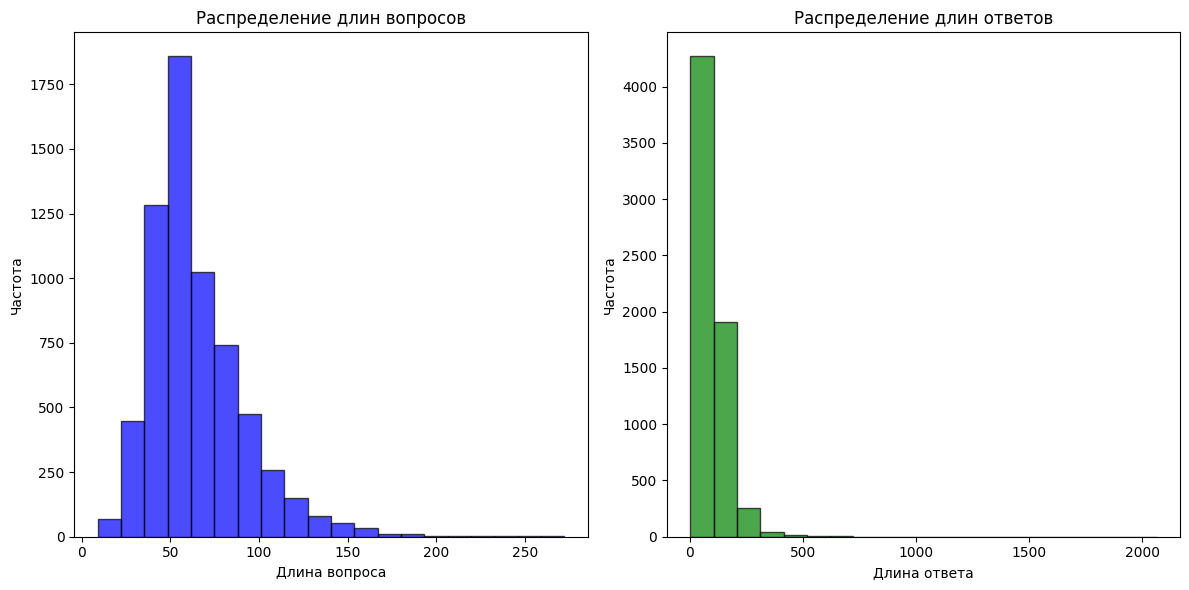

Статистические метрики для вопросов: {'mean': 64.48562202060587, 'median': 58.0, 'std_dev': 27.27944816941767, 'q1': 47.0, 'q3': 77.0, 'iqr': 30.0}
Статистические метрики для ответов: {'mean': 94.05597416576964, 'median': 80.0, 'std_dev': 71.80045179927268, 'q1': 50.0, 'q3': 122.0, 'iqr': 72.0}


In [7]:
question_stats, answer_stats = analyze_and_plot(tests_1)

In [8]:
filtered_data = filter_outliers(tests_1, question_stats, answer_stats)
print("Количество объектов до фильтрации:", len(tests_1))
print("Количество объектов после фильтрации:", len(filtered_data))

Количество объектов до фильтрации: 6503
Количество объектов после фильтрации: 6042


In [9]:
filtered_data[150:200]

[{'question': 'Что надеемся найти в буклете?',
  'answer': 'информацию, которая поможет в повседневной работе'},
 {'question': 'Что мы надеемся, что Вы найдёте в этом буклете?',
  'answer': 'интересную информацию, которая поможет Вам в Вашей повседневной работе'},
 {'question': 'Что хотела бы Хелла поддержать вас в этом?',
  'answer': 'Информация о том, что Хелла хотела бы поддержать вас в этом'},
 {'question': 'Что усложняет возможность успевать за техническими новациями?',
  'answer': 'Информация о развитии технологий в сторону их комплексности'},
 {'question': 'Что усложняет возможность успевать за техническими новациями?',
  'answer': 'Информация о развитии технологий в сторону их комплексности'},
 {'question': 'Какая информация использовалась для создания этого вопроса?',
  'answer': 'текст'},
 {'question': 'Что стоит в центре концепции безопасности Audi?',
  'answer': 'информация о защите жизни людей'},
 {'question': 'Что анализируют инженеры AUDI AG?',
  'answer': 'Инженеры AUDI

In [10]:
def filter_specific_phrases(data):
    filtered_data = [
        obj for obj in data
        if not obj['answer'].lower().startswith('информация о') and not obj['question'].lower().startswith('что содержит') 
        and not obj['question'].lower().startswith('какая информация была использована для создания этого ')
        and not obj['answer'].lower().startswith('информация, которая была использована для генерации вопроса')
        and not 'для генерации этого вопроса?' in obj['question']
        and not 'для создания этого вопроса?' in obj['question']
        and not 'для генерации этого текста' in obj['question']
        and not 'информация' in obj['answer'].lower()
        and not 'информация' in obj['question'].lower()
    ]

    return filtered_data
filtered_data_1 = filter_specific_phrases(filtered_data)
print("Количество объектов после фильтрации:", len(filter_specific_phrases(filtered_data)))

Количество объектов после фильтрации: 1077


In [11]:
import random

In [12]:
random.sample(filtered_data_1, 15)

[{'question': 'Какие технологии были использованы для оптимизации конструкции коробок передач?',
  'answer': 'Использование современных компьютерных технологий'},
 {'question': 'Какие критерии выбора обеспечивают комфортабельную навигацию по музыкальной коллекции?',
  'answer': 'Такие критерии выбора, как исполнитель, альбом, заголовок или жанр, обеспечивают комфортабельную навигацию по музыкальной коллекции с использованием панели управления MMI и кнопок многофункционального рулевого колеса'},
 {'question': 'Что было использовано для генерации вопроса?',
  'answer': 'Программа самообучения 283, стр'},
 {'question': 'Это руководство по ремонту?',
  'answer': 'Она не является руководством по ремонту Указанные значения служат только для облегчения понимания и действительны для имевшихся на момент составления программы самообучения данных'},
 {'question': 'Что обозначает тексты, отображаемые на сегментном дисплее?',
  'answer': 'information what was used to gernerate a question'},
 {'ques

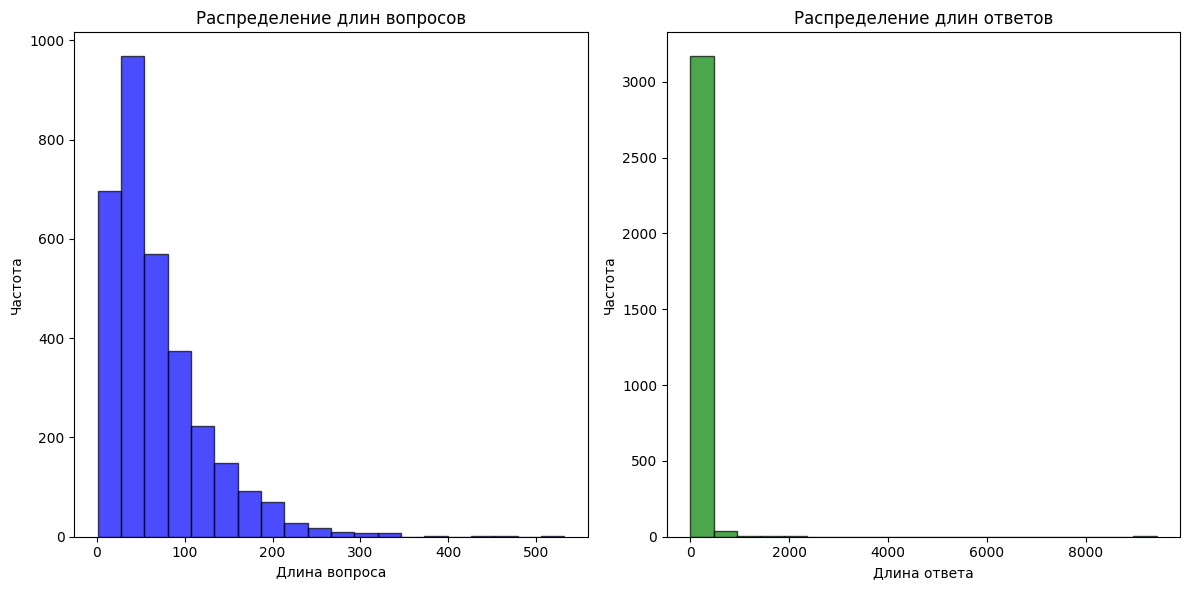

Статистические метрики для вопросов: {'mean': 67.96358543417367, 'median': 53.0, 'std_dev': 56.288231436836746, 'q1': 32.0, 'q3': 91.0, 'iqr': 59.0}
Статистические метрики для ответов: {'mean': 122.24743230625583, 'median': 95.0, 'std_dev': 265.08690228183815, 'q1': 30.0, 'q3': 162.0, 'iqr': 132.0}


In [13]:
question_stats_2, answer_stats_2 = analyze_and_plot(tests_2)

In [14]:
filtered_tests_2 = filter_outliers(tests_2, question_stats_2, answer_stats_2)
print("Количество объектов до фильтрации:", len(tests_2))
print("Количество объектов после фильтрации:", len(filtered_tests_2))

Количество объектов до фильтрации: 3213
Количество объектов после фильтрации: 2968


In [15]:
def filter_by_len(data, length=30):
    return [obj for obj in data if len(obj['question']) > length and len(obj['answer']) > length]
filtered_tests_2_1 = filter_by_len(filtered_tests_2)
print("Количество объектов после фильтрации:", len(filtered_tests_2_1))

Количество объектов после фильтрации: 1813


In [16]:
test_0_2 = random.sample(filtered_tests_2_1, 600)

In [17]:
tests_0_1 = random.sample(filtered_data_1, 400)

In [18]:
test_0_2[:15]

[{'question': 'Check use state and suitability of tools not subjected to regular check',
  'answer': 'Check the condition and suitability of tools that are not subjected to regular checks by visually inspecting them for any signs of wear, damage, or corrosion. Ensure that they are still in good working order and appropriate for the task at hand.'},
 {'question': 'What is the OptiX BWS 1600G DWDM Backbone Optical Transmission System?',
  'answer': 'The OptiX BWS 1600G DWDM Backbone Optical Transmission System is a hardware-based product that includes a cabinet, subrack, power, fan, board, and various interfaces.'},
 {'question': 'Расположение ее струй должно быть отрегулировано в соответствии с конструкцией камеры сгорания',
  'answer': 'Для этого необходима работа двигателя на обедненной смеси со значением лямбда > 1 (для обеспечения достаточного количества остаточного кислорода в отработавших газах).'},
 {'question': 'Во проийдении ремешнввния нитронраси расво',
  'answer': 'Во время 

In [19]:
to_test = tests_0_1 + test_0_2

In [20]:
random.sample(to_test, 15)

[{'question': 'Почему комплексная система управления не получила широкого распространения в Европе?',
  'answer': 'Поскольку в Европе требования на экономичность и чистоту отработавших газов не так жестки, как в Японии или в США, комплексная система управления не получила там широкого распространения.'},
 {'question': 'Что использовалось для генерации информационной базы данных?',
  'answer': 'Mongoose - библиотека, которая позволяет взаимодействовать с базой данных MongoDB, обеспечивая удобный доступ к данным и возможность создания схем для объектов и моделей'},
 {'question': 'Что было использовано для генерации вопроса?',
  'answer': 'Транзисторный регулятор напряжения'},
 {'question': 'Что было использовано для подготовки учебного пособия в Учебном Центре ЗАО ДаймлерКрайслер Автомобили РУС в 2005 году?',
  'answer': 'материалы фирмы DaimlerChrysler AG'},
 {'question': 'Замена элемента питания и последовательно введите секретный код, а также подключите метки к системе',
  'answer': '

In [21]:
from lib.component.chat_ai import get_model_13_04


chat = get_model_13_04("meta-llama/llama-3-8b-instruct")

/home/dennis/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/dennis/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
2024-05-19 18:28:33.742495: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-19 18:28:33.772198: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in perfo

In [25]:
chat.ask("сколько слоев крас4ки может быть?")

Batches: 100%|██████████| 1/1 [00:00<00:00, 24.40it/s]


{'original': 'сколько слоев крас4ки может быть?',
 'sources': [Document(page_content=' В производстве окрасочных линий могут отличаться параметры, такие как толщина слоя краски, температура и продолжительность сушки.', metadata={'chapter_name': 'Колеровка', 'file_name': '215_Окончательное окрашивание.pdf'}),
  Document(page_content='Из-за необходимости использования на автомобилях разных моделей различных видов декоративных щитков предусмотрено несколько вариантов исполнения этой детали с различающимися номерами', metadata={'chapter_name': 'Информационно-командная система Infotainment', 'file_name': '398_Audi Ассистент движения по полосе.pdf', 'part_id': 'c7bbc8e6-ce3e-439c-8951-b2ac4e099113'}, _lc_kwargs={'page_content': 'Из-за необходимости использования на автомобилях разных моделей различных видов декоративных щитков предусмотрено несколько вариантов исполнения этой детали с различающимися номерами', 'metadata': {'chapter_name': 'Информационно-командная система Infotainment', 'file

In [27]:
c = _

In [28]:
for test in to_test:
    test['prediction'] = chat.ask(test['question'])['answer']

Batches: 100%|██████████| 1/1 [00:00<00:00, 56.41it/s]


BadRequestError: Error code: 400 - {'error': {'message': "This endpoint's maximum context length is 8192 tokens. However, you requested about 8341 tokens (6293 of text input, 2048 in the output). Please reduce the length of either one.", 'code': 400}}

In [33]:
prs = [test for test in to_test if 'prediction' in test]

In [34]:
len(prs)

865

In [36]:
random.sample(prs, 10)

[{'question': 'Пользующийся хорошей репутацией поставщик международной автомобильной промышленности',
  'answer': 'Пользующийся хорошей репутацией поставщик международной автомобильной промышленности',
  'prediction': 'Ответ: Audi.'},
 {'question': 'Какой двигатель у Audi 2,0 л TDI?',
  'answer': 'Двигатель Audi 2,0 л TDI с системой впрыска Common Rail',
  'prediction': 'В документах не содержится информации о двигателе Audi 2,0 л TDI. В документах есть информация о двигателе FSI с турбонаддувом, но не о TDI.'},
 {'question': 'Что используется для надежной герметизации блока цилиндров ГБЦ?',
  'answer': 'Прокладки головки',
  'prediction': 'Вот ответ на вопрос в русском языке:\n\nДля надежной герметизации блока цилиндров ГБЦ используются детали, соединенные между собой плазменной пайкой.'},
 {'question': 'Что делать, если двигатель не запускается в течение 15 секунд, а стартер перегревается?',
  'answer': 'Использовать следующий метод: Если двигатель не запускается в течение 15 секунд,

In [37]:
save_dicts_to_jsonl(prs, "/home/dennis/llp/eval/evals/registry/data/testrag/llama3_19_05.jsonl")

In [2]:
cmnd_r = load_dicts_from_jsonl("/home/dennis/llp/eval/evals/registry/data/testrag/cmnd-r_19_05.jsonl")

In [3]:
llama3 = load_dicts_from_jsonl("/home/dennis/llp/eval/evals/registry/data/testrag/llama3_19_05.jsonl")

In [5]:
for obj in cmnd_r:
    obj['input'] = obj['question']
    obj['reference'] = obj['answer']

In [7]:
for obj in llama3:
    obj['input'] = obj['question']
    obj['reference'] = obj['answer']

In [10]:
for obj in cmnd_r:
    del obj['question']
    del obj['answer']
for obj in llama3:
    del obj['question']
    del obj['answer']

In [11]:
save_dicts_to_jsonl(cmnd_r, "/home/dennis/llp/eval/evals/registry/data/testrag/cmnd-r_19_05.jsonl")
save_dicts_to_jsonl(llama3, "/home/dennis/llp/eval/evals/registry/data/testrag/llama3_19_05.jsonl")

eval

In [12]:
from lib import ModelBuilder, load_dicts_from_jsonl, save_dicts_to_jsonl
from langchain.evaluation import load_evaluator
import logging

format = "%(asctime)s: %(message)s"
logging.basicConfig(format=format, level=logging.INFO,
                        datefmt="%H:%M:%S")

accuracy_criteria = {
    "accuracy": """
Score 10: The submitted answer is a subset of the expert answer and is fully consistent with it.
Score 9: The submitted answer is a superset of the expert answer and is fully consistent with it.
Score 7: The submitted answer contains all the same details as the expert answer.
Score 3: There is a disagreement between the submitted answer and the expert answer.
Score 1: The answers differ, but these differences don't matter from the perspective of factuality."""
}

def info_handler(result: str): 
    return logging.info(result)
def warning_handler(result: str):
    return logging.warning(result)
def error_handler(result: str):
    return logging.error(result)

logging_handlers = {
    1: error_handler,
    3: warning_handler,
    7: info_handler,
    9: info_handler,
    10: info_handler,
    0: info_handler,
}

def extend_file_name(fp, ext=".jsonl"):
    return fp.replace(ext, "_results"+ext)

In [13]:
model = ModelBuilder.createVseGptModel("openai/gpt-3.5-turbo-0125", 0)
evaluator = load_evaluator(
    "labeled_score_string",
    criteria=accuracy_criteria,
    llm=model,
)

In [14]:
eval_cmnd_r = []

In [15]:
evaluator(cmnd_r[0])

/home/dennis/.local/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(
22:52:10: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"


{'prediction': 'Новая книга посвящена системам безопасности автомобилей Audi. В частности, в ней описываются системы пассивной безопасности, их история развития, а также система безопасности конкретной модели Audi A3 2004 года. Кроме того, в книге упоминается исследование центра Audi по изучению автомобильных аварий (Audi Accident Research Unit), посвященное улучшению защитного потенциала автомобилей этого производителя.',
 'input': 'Чем посвящена новая специализированная книга для автомобилистов?',
 'reference': 'Известным присадкам и добавкам к различным автомобильным технологическим средам смазочным материалам, топливу, охлаждающим, а также к стеклоочищающим жидкостям, получившим обобщенное название автохимия',
 'results': {'reasoning': "The response provided by the AI assistant does not address the question accurately. The user asked about a new specialized book for car enthusiasts, but the AI assistant's answer focuses on safety systems in Audi vehicles. This is a significant devi

In [16]:
for obj in cmnd_r:
    try:
        ev = evaluator(obj)
    except:
        print("err ", obj)
        continue
    eval_cmnd_r.append(ev)

22:55:17: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
22:55:20: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
22:55:22: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
22:55:25: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
22:55:27: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
22:55:29: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
22:55:32: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
22:55:35: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
22:55:39: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
22:55:42: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
22:55:44: HTTP Request: POST https://api.vsegpt.ru:7090/v1/c

err  {'prediction': 'Программа самообучения 293 содержит информацию о системе AudioPilot в контексте информационно-командной системы Infotainment Audi A8 03 модельного года.', 'input': 'Что описывается в программе самообучения?', 'reference': 'Основные положения новых конструкций и принципов их действия, новых компонентов автомобиля или новых технологий'}


22:56:38: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
22:56:41: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
22:56:44: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
22:57:03: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
22:57:06: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
22:57:09: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
22:57:11: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
22:57:14: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
22:57:17: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
22:57:20: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
22:57:22: HTTP Request: POST https://api.vsegpt.ru:7090/v1/c

err  {'prediction': 'Информация о шине находится в программе самообучения 320 1018 KL012791, которая посвящена электрооборудованию автомобиля Audi A3 04 модельного года.', 'input': '320 1018 KL012791 ɋɴɟɦɧɢɤ ɧɚɤɨɧɟɛɧɢɤɚ ɩɪɨɜɨɞɚ ɤ ɫɜɟɛɟ ɡɚɠɢɝɚɧɢɹ 6', 'reference': 'The text is a combination of numbers, letters, and symbols that do not form a coherent question or provide a clear context for an answer. Please provide a clear question for a better understanding of the answer.'}


23:25:37: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
23:25:40: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
23:25:43: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
23:25:46: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
23:25:50: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
23:25:53: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
23:25:56: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
23:25:59: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
23:26:02: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
23:26:06: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
23:26:09: HTTP Request: POST https://api.vsegpt.ru:7090/v1/c

err  {'prediction': 'Целью исследовательской группы было тщательно проанализировать аварии, изучить детали происходящих процессов и разработать направления по улучшению защитных возможностей автомобиля.', 'input': 'What is the purpose of performance detection and adjustment units?', 'reference': 'The purpose of performance detection and adjustment units is to monitor and adjust the performance of the engine based on various parameters to ensure optimal operation.'}


23:46:00: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
23:46:02: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
23:46:05: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
23:46:07: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
23:46:11: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
23:46:14: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
23:46:17: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
23:46:21: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
23:46:24: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
23:46:27: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
23:46:32: HTTP Request: POST https://api.vsegpt.ru:7090/v1/c

In [17]:
len(eval_cmnd_r)

997

In [18]:
save_dicts_to_jsonl(eval_cmnd_r, "/home/dennis/llp/eval/evals/registry/data/testrag/cmnd-r_19_05_predicted.jsonl")

In [74]:
import matplotlib.pyplot as plt
import collections

def count_and_plot_scores(results, model_name=""):
    """
    This function takes a list of result objects, counts the occurrences of each score,
    and plots a bar chart of the distribution of scores.
    
    Parameters:
    results (list of dict): List of result objects where each object contains a 'score' key.
    
    Returns:
    None
    """
    # Count the scores
    score_counts = {}
    for result in results:
        score = result.get("score")
        if score in score_counts:
            score_counts[score] += 1
        else:
            score_counts[score] = 1
    text_str = "\n".join([f"{obj[0]}: {obj[1]}" for obj in collections.OrderedDict(sorted(score_counts.items())).items()])
    # Prepare data for plotting
    scores = list(score_counts.keys())
    counts = list(score_counts.values())

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(scores, counts, color='skyblue')
    plt.xlabel('Scores')
    plt.ylabel('Counts')
    plt.title(f'Distribution of Scores {model_name}')
    plt.xticks(scores)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.text(0.5, len(results) / 3, s=text_str,fontsize=14,
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    plt.show()

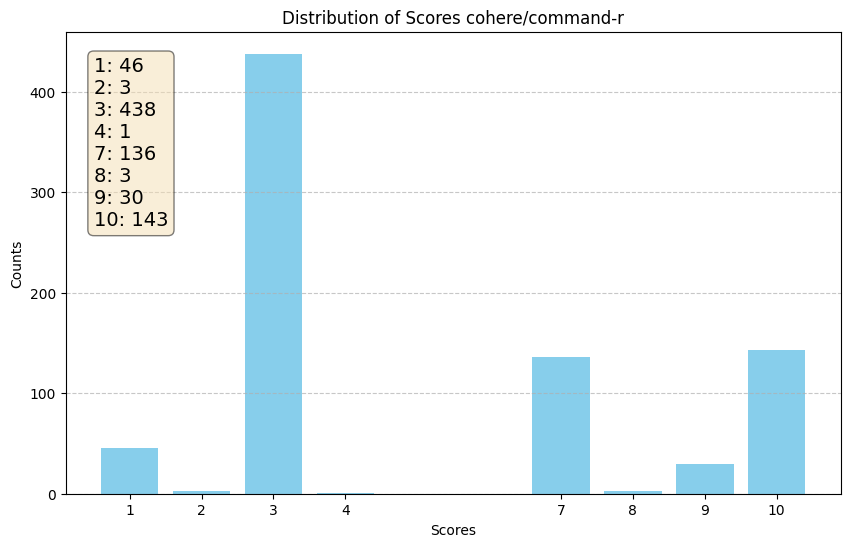

In [75]:
count_and_plot_scores([obj['results'] for obj in eval_cmnd_r[:800]], "cohere/command-r")

In [22]:
eval_llama3 = []
for obj in llama3:
    try:
        ev = evaluator(obj)
    except:
        print("err ", obj)
        continue
    eval_llama3.append(ev)
save_dicts_to_jsonl(eval_cmnd_r, "/home/dennis/llp/eval/evals/registry/data/testrag/llama3_19_05_predicted.jsonl")

00:00:30: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
00:00:34: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
00:00:38: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
00:00:42: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
00:00:46: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
00:00:50: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
00:00:55: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
00:00:59: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
00:01:02: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
00:01:06: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
00:01:09: HTTP Request: POST https://api.vsegpt.ru:7090/v1/c

err  {'prediction': 'В заднем блоке реле, расположенном в левой части багажника, содержатся следующие элементы: реле переключения стартерной батареи (100), реле переключения сетевой батареи (432), реле топливного насоса 1 (404), реле топливного насоса 2 (404), реле в цепи клеммы 50 (433), реле обогревателя заднего стекла 1 (100), реле обогревателя заднего стекла 2 (104), реле пневматической подвески (214) и реле привода крышки топливного бака (404).', 'input': '17 ɬ 409 KL00438211 Ɋɚɦɚ ɩɪɟɫɫɚ ɦɚɤɫ', 'reference': 'The text provided is a mix of English and a non-English language. It is not possible to provide a meaningful answer without further context or translation.'}


00:25:26: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
00:25:29: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
00:25:32: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
00:25:36: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
00:25:40: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
00:25:43: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
00:25:47: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
00:25:51: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
00:25:56: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
00:25:59: HTTP Request: POST https://api.vsegpt.ru:7090/v1/chat/completions "HTTP/1.1 200 OK"
00:26:04: HTTP Request: POST https://api.vsegpt.ru:7090/v1/c

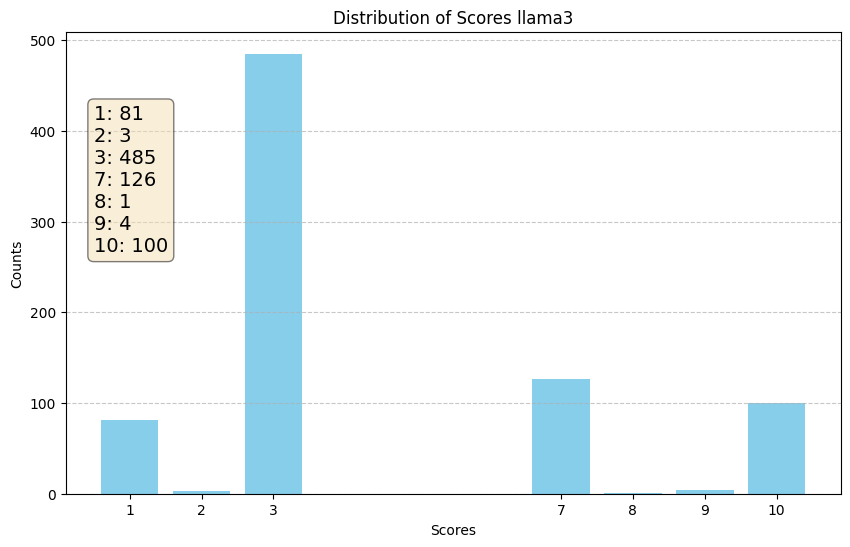

In [76]:
count_and_plot_scores([obj['results'] for obj in eval_llama3[:800]], "llama3")

In [29]:
import random

In [33]:
good_answers = []
for obj in random.sample(eval_llama3, 50):
    cop_obj = dict(obj)
    print(obj['input'])
    if input() != "":
        good_answers.append(cop_obj)

Как определяется температура наружного воздуха?
При модернизации небольших по рабочему объёму, но мощных двигателей этого модельного ряда основной упор делался на что?
What is the purpose of the optical supervisory unit and system control and communication unit?
Что предназначен автомобиль Audi allroad quattro?
Что усложняет возможность успевать за техническими новациями?
Гараж выступает очень удобным местом хранения различных вещей, таких как автодетали и инструменты для ремонта, складирование которых дома может доставлять неудобства?
Do not directly supply electronic central units servo components at nominal vehicle voltage
Что поможет изучить ключевые процессы и окажет помощь в их практической реализации?
Какой процесс необходимо выполнить для начала работы?
Чем отличаются VR-двигатели?
Disconnect the batteries from the system during their recharging with an external apparatus
Изображение транспортировки египетского каменного колосса
Какая модель Audi описана в тексте?
Какая програм

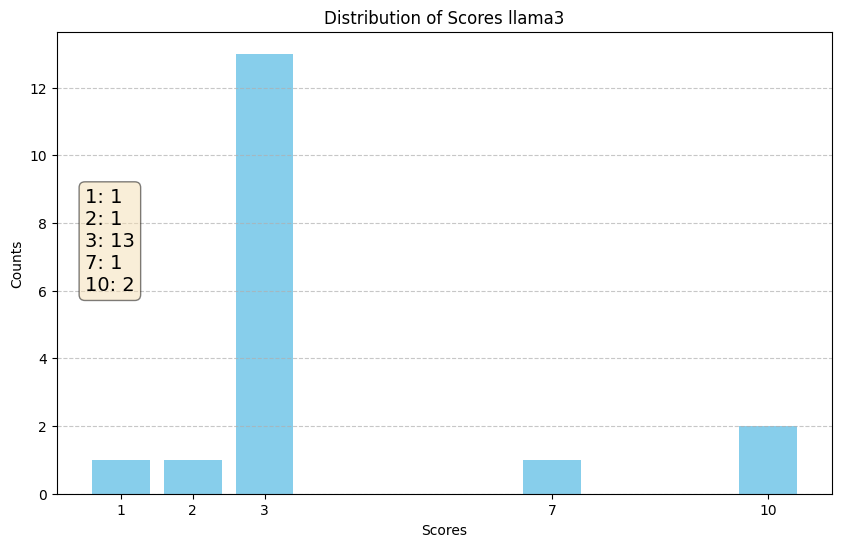

In [77]:
count_and_plot_scores([obj['results'] for obj in good_answers[:800]], "llama3")

In [35]:
good_cmnd_r = []
for obj in random.sample(eval_cmnd_r, 50):
    cop_obj = dict(obj)
    print(obj['input'])
    if input() != "":
        good_cmnd_r.append(cop_obj)

Make sure that the electronic devices wiring harnesses length, lead type, location, strapping, connection to screening braiding, bonding, etc
Что было использовано для создания основного издания Руководства по ремонту?
Что сделал изобретатель после работы над газовыми двигателями?
Какие сведения приводятся в пособиях по программе самообразования?
Какие требования соответствуют изделиям?
Какая программа самообучения связана с информационно-командной системой Infotainment в Audi A4?
What was the purpose of opening a branch in the UK?
Смотрите также заметки в Сервисной книге
Как осуществляется размножение и передача информации?
Как переставить часы на несколько минут?
Чем оснащен Audi A605 в базовой комплектации?
Какова способность двигателя обеспечивать оптимальное наполнение при различном числе оборотов?
Какой двигатель указан в программе самообучения 316 Двигатель TDI 2,0л?
Для сведения к минимуму риска ДТП, необходимыми являются такие качества, как совершенство регулировки фар и испра

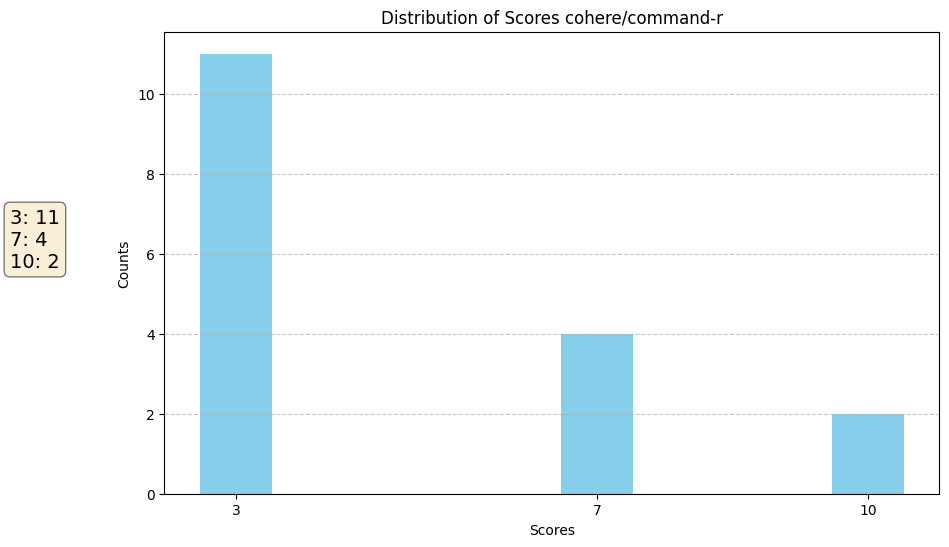

In [78]:
count_and_plot_scores([obj['results'] for obj in good_cmnd_r[:800]], "cohere/command-r")

In [79]:
good_answers

[{'prediction': "Температура наружного воздуха не определяется в данных документах. В документе с метаданными {'chapter_name': 'Crafter — Hydronic D5WS', 'file_name': '415_Доп.отопители для NFZ ч.1.pdf'} есть информация о том, как работает автономный отопитель, но не о температуре наружного воздуха.",
  'input': 'Как определяется температура наружного воздуха?',
  'reference': 'При поворачивании ключа зажигания в положении 2',
  'results': {'reasoning': "The response provided by the AI assistant does not address the question about how the outside air temperature is determined. Instead, it mentions information about an autonomous heater but does not provide relevant details on the topic of outside air temperature determination. Therefore, the answer is not accurate or relevant to the user's question.\n\nRating: [[3]]",
   'score': 3}},
 {'prediction': 'В ответе на вопрос: При модернизации небольших по рабочему объёму, но мощных двигателей этого модельного ряда основной упор делался на у

In [80]:
good_cmnd_r

[{'prediction': 'Audi A6 05 в базовой комплектации оснащён боковыми подушками безопасности, идентичными модулями, которые установлены на Audi A3 Sportback. Также в систему безопасности входят активные подголовники передних сидений.',
  'input': 'Чем оснащен Audi A605 в базовой комплектации?',
  'reference': 'Ходовой частью со стальными пружинами',
  'results': {'reasoning': 'The user question is inquiring about the equipment included in the base configuration of the Audi A605. The AI assistant\'s response provides information about safety features such as side airbags, identical modules to those in the Audi A3 Sportback, and active front seat head restraints. However, the response does not directly address the specific component "Ходовой частью со стальными пружинами" mentioned in the ground truth. Therefore, there is a discrepancy in the details provided.\n\nRating: [[3]]',
   'score': 3}},
 {'prediction': 'Информация об двигателе TDI 2,0 л отсутствует. В программе самообучения указан